In [18]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import json
import numpy as np
from cycler import cycler
from matplotlib.pyplot import cm

In [30]:
# output_folder = "tmp_output"
output_folder = "/mnt/d/Projects/covid-19/sensitivity"
all_scenarios = next(os.walk(output_folder))[1]

,App coverage,R,Tests Needed
0,0.1000,0.8750,0.45
1,0.2125,1.0000,0.51
2,0.3250,1.0625,0.56
3,0.4375,1.0000,0.70
4,0.5500,0.7500,0.64
5,0.6625,0.8125,0.65
6,0.7750,0.9375,0.73
7,0.8875,1.0000,0.79
8,1.0000,0.9375,0.82
9,0.1000,1.0625,0.45


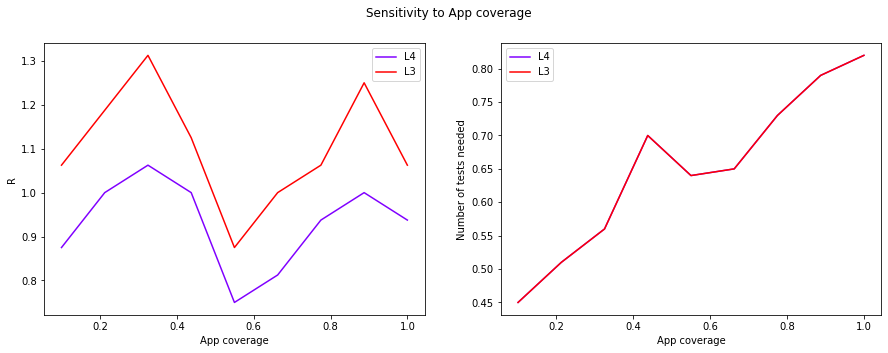

In [32]:
def get_param_data(param, scenarios, output_folder):
    config_count = len(glob.glob(f'{output_folder}/{scenarios[0]}/*.json'))
    
    df_list = []

    for scenario in scenarios:
        for i in range(config_count):
            config_path = f'{output_folder}/{scenario}/config_{i}.json'
            run_path = f'{output_folder}/{scenario}/run_{i}.csv'

            with open(config_path) as config_file:
                run_config = json.load(config_file)

            if run_config['sensitivity_target'] == param:
                df = pd.read_csv(run_path, index_col=None, header=0)
                df['Strategy'] = scenario
                df[param] = run_config['config'][param]
                df_list.append(df)

    return pd.concat(df_list, axis=0, ignore_index=True)



def plots_for_param(param, df, scenarios, param_label=None, plot_tests=True, save_as=None):
    if param_label is None:
        param_label = param


    colors = cm.rainbow(np.linspace(0, 1, len(scenarios)))
        
    fig = plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    for i, scenario in enumerate(scenarios):
        plt.plot(df[df['Strategy']==scenario][param], df[df['Strategy']==scenario]['Reduced R'], c=colors[i], label=scenario);
    plt.xlabel(param_label);
    plt.ylabel('R');
    plt.legend()

    plt.subplot(1, 2, 2)
    for i, scenario in enumerate(scenarios):
        plt.plot(df[df['Strategy']==scenario][param], df[df['Strategy']==scenario]['Tests Needed'], c=colors[i], label=scenario);
    plt.xlabel(param_label);
    plt.ylabel('Number of tests needed');
    plt.legend()
    
    plt.suptitle(f'Sensitivity to {param_label}')
    
    
    if save_as is not None:
        plt.savefig(save_as)

def table_for_param(param, df, param_label=None, as_latex=True):
    df = df[[param, 'Reduced R', 'Tests Needed']]
    
    if param_label is None:
        param_label = param
    
    df = df.rename(columns={param: param_label, 'Reduced R': 'R'})
    
    if as_latex:
        return df.to_latex()
    else:
        return df

# example usage
df = get_param_data("app_cov", ["L4", "L3"], "tmp_output")
plots_for_param("app_cov", df, param_label="App coverage", scenarios=["L4", "L3"], save_as=None)
table_for_param("app_cov", df, param_label="App coverage", as_latex=False)

In [7]:
parameters = [
    {'name': 'testing_delay', 'label': 'Time needed to get test result',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'manual_trace_delay', 'label': 'Time needed to trace contacts without an app',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'app_cov', 'label': 'App uptake',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'trace_adherence', 'label': 'Policy adherence to quarantine on being traced as a contact',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'app_report_prob', 'label': 'Probability of reporting symptoms via app',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'manual_report_prob', 'label': 'Probability of reporting symptoms without app',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'latent_period', 'label': 'Period from getting infected to being infectious',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'met_before_o', 'label': 'Probability the case person met contacts in Other before',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'max_contacts', 'label': 'Max contacts a person can have a day',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
    
    {'name': 'wfh_prob', 'label': 'WFH probability',
     'show_plot': True, 'show_table': False,
     'plot_pareto': False, 'save_as': None},
]

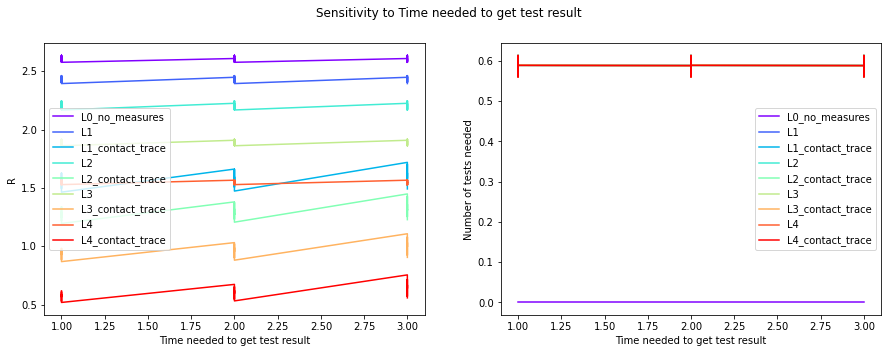

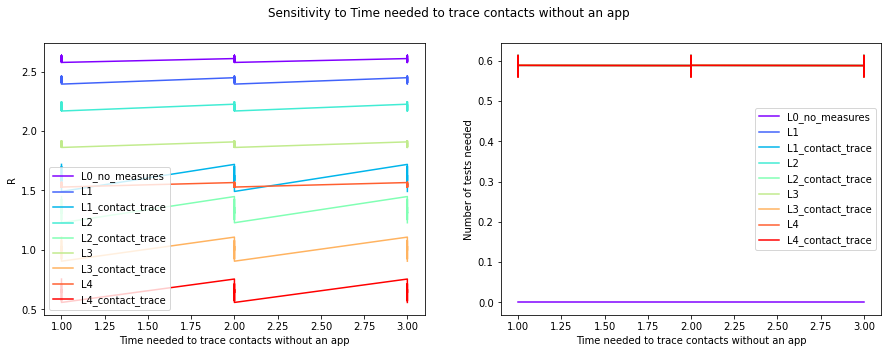

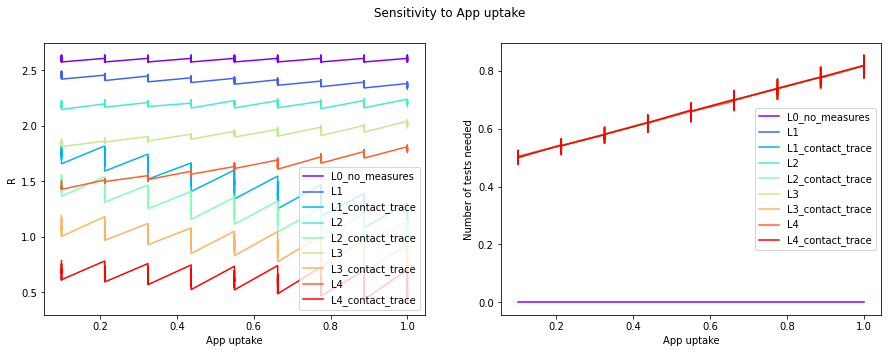

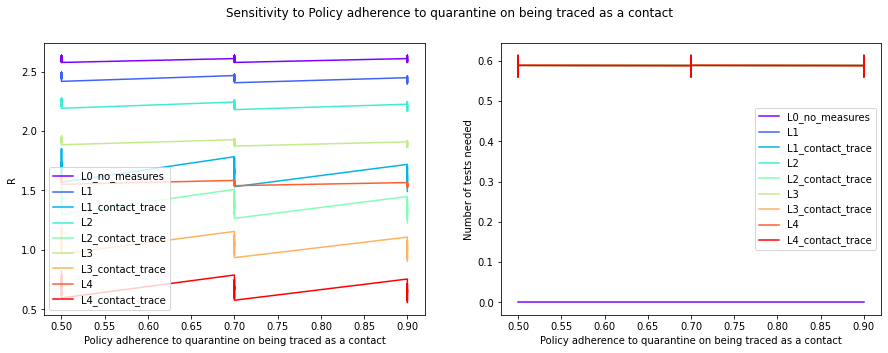

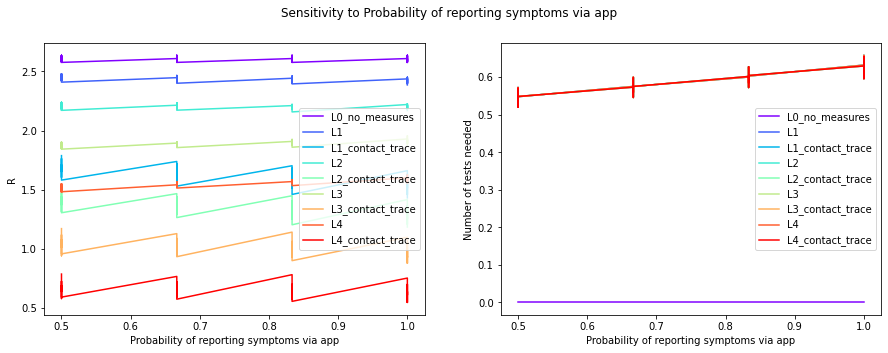

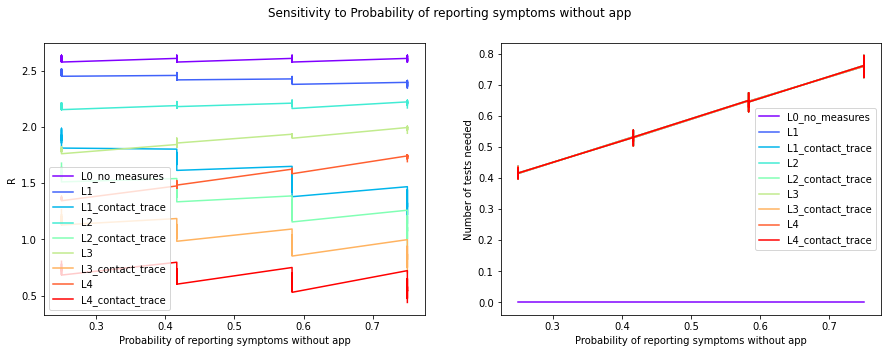

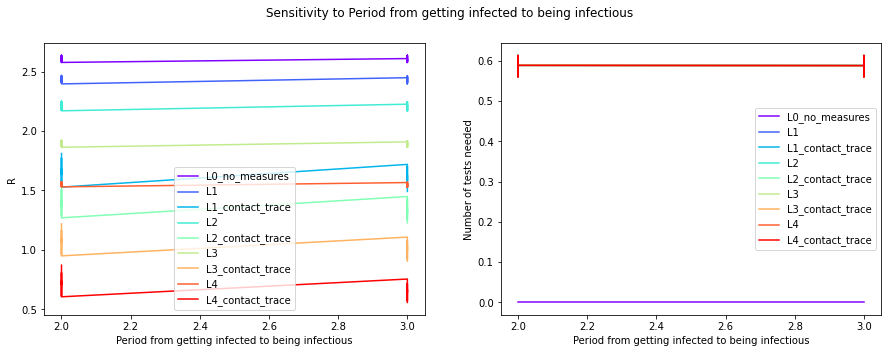

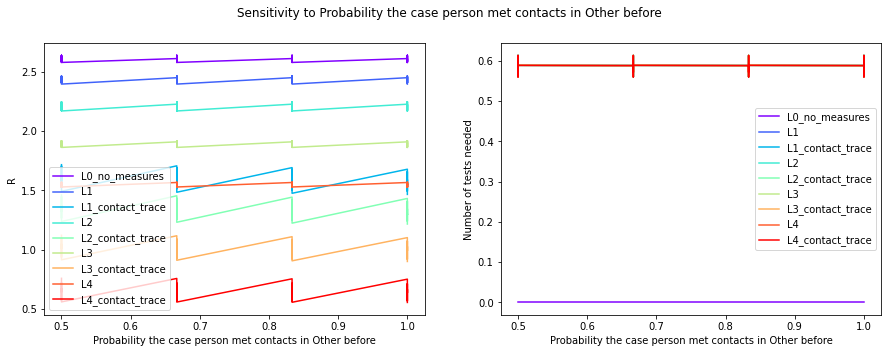

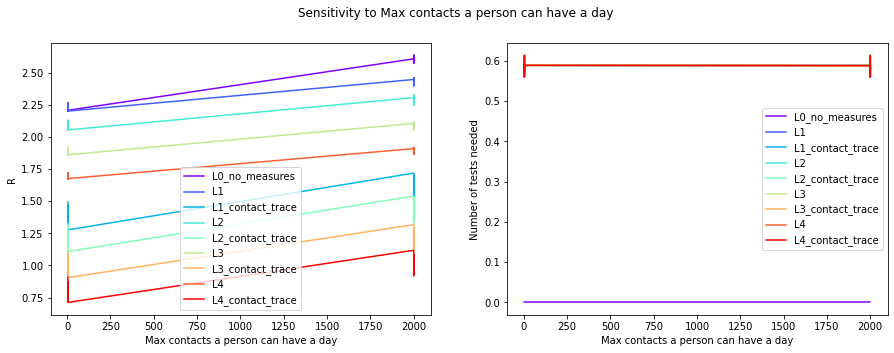

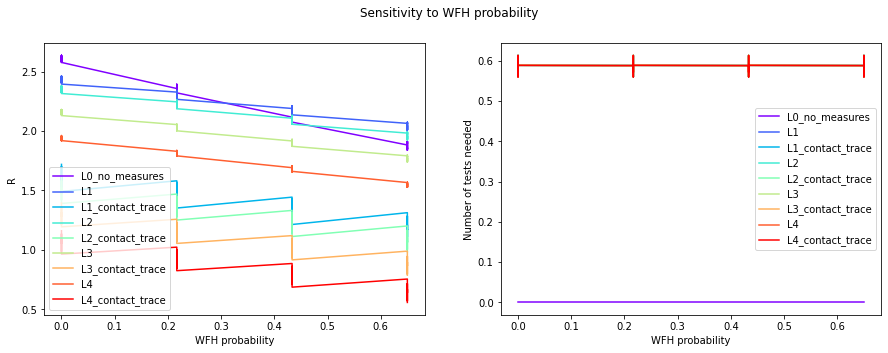

In [33]:
scenarios_to_plot = all_scenarios

for param in parameters:
    df = get_param_data(param['name'], scenarios_to_plot, output_folder)
    if param['show_plot']:
        plots_for_param(param['name'], df, param_label=param['label'], scenarios=scenarios_to_plot,
                        save_as=param['save_as'])

    if param['show_table']:
        print(table_for_param(param['name'], df, param_label=param['label'], as_latex=param['as_latex']))